# MODULES

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import wrapcauchy, levy_stable
import math
from scipy.stats import cauchy



# CLASSES

In [23]:
# Clase Vec2d para manejar vectores 2D
class Vec2d:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        return Vec2d(self.x + other.x, self.y + other.y)
    
    def rotated(self, angle):
        cos_a = np.cos(angle)
        sin_a = np.sin(angle)
        return Vec2d(self.x * cos_a - self.y * sin_a, self.x * sin_a + self.y * cos_a)
    
    def to_tuple(self):
        return (self.x, self.y)

# Activity 1: Correlated Random Walk - 1 Trajectory

In [24]:
def correlated_random_walk(n_steps=1000, scale=1.0):
    pos = Vec2d(0, 0)
    trajectory = [pos.to_tuple()]
    
    for i in range(n_steps):
        angle = cauchy.rvs(scale=scale)  # Generar un ángulo con distribución de Cauchy
        step = Vec2d(1, 0).rotated(angle)
        pos += step
        trajectory.append(pos.to_tuple())

    print("Primeros 5 puntos de la trayectoria:", trajectory[:5])  # Verifica si hay datos

    x, y = zip(*trajectory)
    
    print("Cantidad de puntos generados:", len(x))  # Debe ser n_steps + 1

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CRW 1 Trajectory'))
    fig.show()

# Llamada de prueba
correlated_random_walk()

Primeros 5 puntos de la trayectoria: [(0, 0), (np.float64(0.06996828614580476), np.float64(0.9975492162965288)), (np.float64(-0.2047366081591659), np.float64(1.9590778019583879)), (np.float64(0.7638441132607627), np.float64(1.7103784129489847)), (np.float64(0.8596234767329679), np.float64(2.7057810016199504))]
Cantidad de puntos generados: 1001


# Activity 2: Lévy Distribution - N Different Curves

In [25]:
alphas = [0.5, 1.0, 1.5, 2.0]
x_vals = np.linspace(-5, 5, 1000)
fig = go.Figure()
for alpha in alphas:
    pdf_vals = levy_stable.pdf(x_vals, alpha, 0)
    fig.add_trace(go.Scatter(x=x_vals, y=pdf_vals, mode='lines', name=f'alpha={alpha}'))
fig.show()


# Activity 3: Lévy Distribution - Histogram + Curve

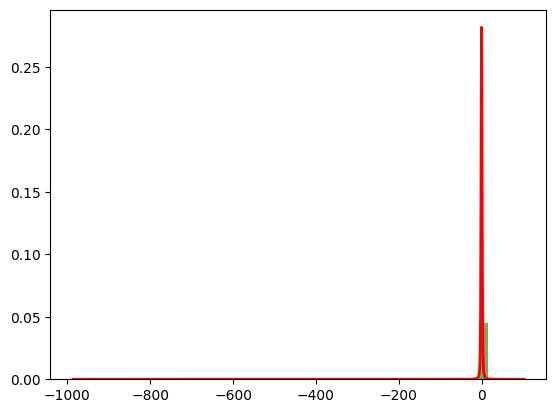

In [26]:
samples = levy_stable.rvs(1.5, 0, size=10000)
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')
x_vals = np.linspace(min(samples), max(samples), 1000)
pdf_vals = levy_stable.pdf(x_vals, 1.5, 0)
plt.plot(x_vals, pdf_vals, 'r-', lw=2)
plt.show()


# Activity 4: Lévy Flight - Vec2d - 1 Trajectory

In [ ]:
def levy_flight(n_steps=1000, alpha=1.5, scale=1.0):
    pos = Vec2d(0, 0)
    trajectory = [pos.to_tuple()]

    for i in range(n_steps):
        step_size = np.abs(levy_stable.rvs(alpha, 0, scale=scale))  # Tamaño del paso con Lévy
        angle = np.random.uniform(0, 2 * np.pi)  # Ángulo aleatorio
        step = Vec2d(step_size, 0).rotated(angle)
        pos += step
        trajectory.append(pos.to_tuple())

    print("Primeros 5 puntos de la trayectoria:", trajectory[:5])  # Verifica si hay datos

    x, y = zip(*trajectory)
    z = np.linspace(0, 1, len(x))  # Crear un eje Z para la visualización 3D
    
    print("Cantidad de puntos generados:", len(x))  # Debe ser n_steps + 1

    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Lévy Flight'))
    fig.show()

# Llamada de prueba
levy_flight()


# Activity 5: Correlated Random Walk - Vec2d - N Trajectories

In [28]:
def correlated_random_walk_n(n_traj=5, steps=1000):
    fig = go.Figure()
    for _ in range(n_traj):
        positions = [Vec2d(0, 0)]
        cauchy_coeff = np.random.uniform(0.1, 1.0)
        for _ in range(steps):
            angle = wrapcauchy.rvs(cauchy_coeff) * 2 * np.pi
            step = positions[-1].rotated(angle)
            positions.append(step)
        x_vals, y_vals = zip(*[(p.x, p.y) for p in positions])
        fig.add_trace(go.Scatter3d(x=x_vals, y=y_vals, z=list(range(steps+1)), mode='lines'))
    fig.show()
